# Dimension Reduction

"… dimensionality reduction yields a more compact, more easily interpretable representation of the target concept, focusing the user’s attention on the most relevant variables."

— Page 289, Data Mining: Practical Machine Learning Tools and Techniques, 4th edition, 2016.

차원 축소:

- PCA : 입력 데이터의 공분산 행력이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식  
    - 여러 속성의 값을 연산해야 하므로 '속성의 스케일'에 영향을 받음 => 스케일 변환 필요  
    - 파라미터  
        - n_components: PCA로 변환할 차원의 수  

In [50]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


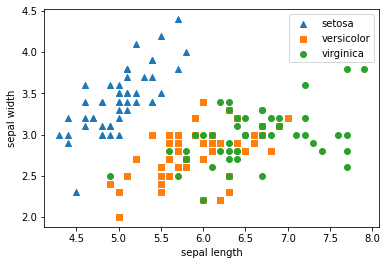

In [51]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [54]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


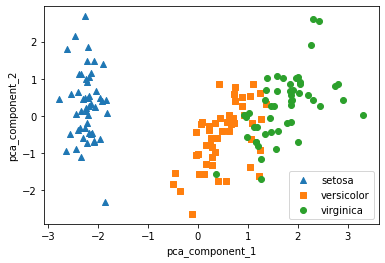

In [55]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [56]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- LDA : 선형 판별 분석법. 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함.  
    - 입력 데이터의 결정 값 클랫를 최대한으로 분리할 수 있는 축을 찾음

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


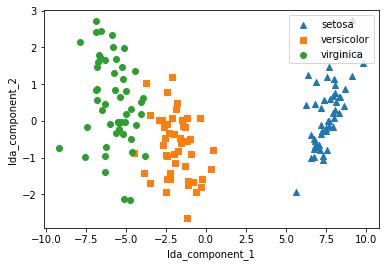

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

- SVD : 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐.

In [59]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [60]:
U,Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [61]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- TruncatedSVD : 시그마 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식  
    - 인위적으로 더 작은 차원의 U, Sigma, V^T로 분해하기 때문에 원본 행력을 정확하게 다시 원복할 수는 없다.  
    - 하지만, 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음.  

Text(0, 0.5, 'TruncatedSVD Component 2')

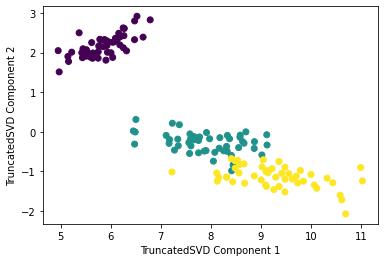

In [62]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함 => PCA가 SVD 알고리즘으로 구현됐음을 의미함  

- NMF : Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형.  

Text(0, 0.5, 'NMF Component 2')

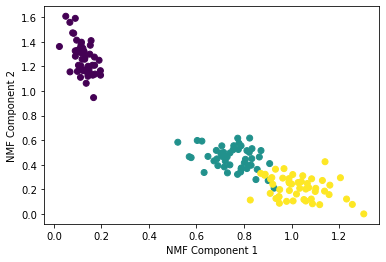

In [63]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

=> NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨

----

## Import package

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error

-----

## Load Data

사이킷런에 내장된 보스턴 주택 가격 데이터

- CRIM : 지역별 범죄 발생률  
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수  
    - (강의 경계에 위치한 경우는 1, 아니면 0  
- NOX : 일산화질소 농도  
- RM : 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 거리  
- RAD : 고속도로 접근 용이도 지수  
- TAX : 10,000 달러 당 재산세율  
- PTRAIO : town별 학생/교사 비율  
- B : town별 흑인의 비율  
- LSTAT : 하위계층 비율(%)  
- MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [65]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [66]:
df_boston = pd.read_csv('../../../input/boston_house/boston_house_price.csv')

In [67]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> non-null, all data is float types

-----

## EDA

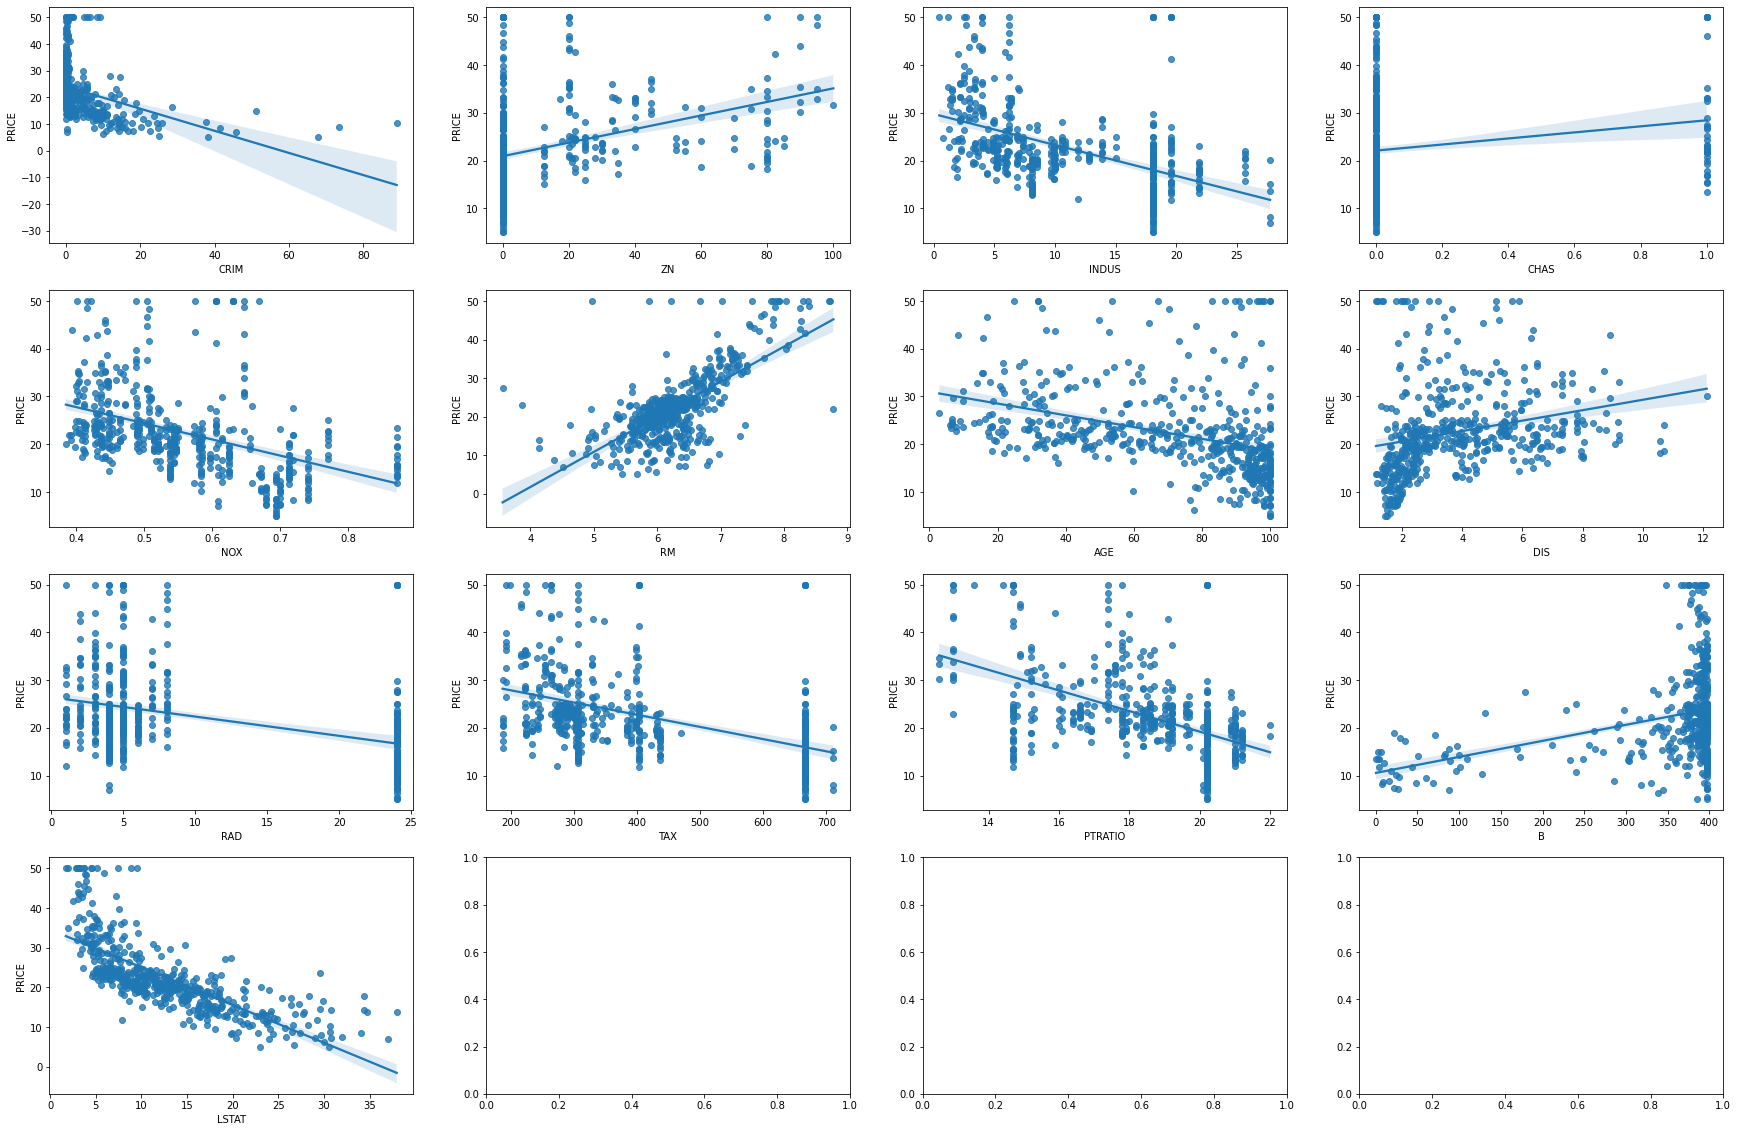

In [69]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=df_boston,ax=axs[row][col])


-----

## PreProcessing

### Dimension Reduction

### Train, Test set split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

<AxesSubplot:>

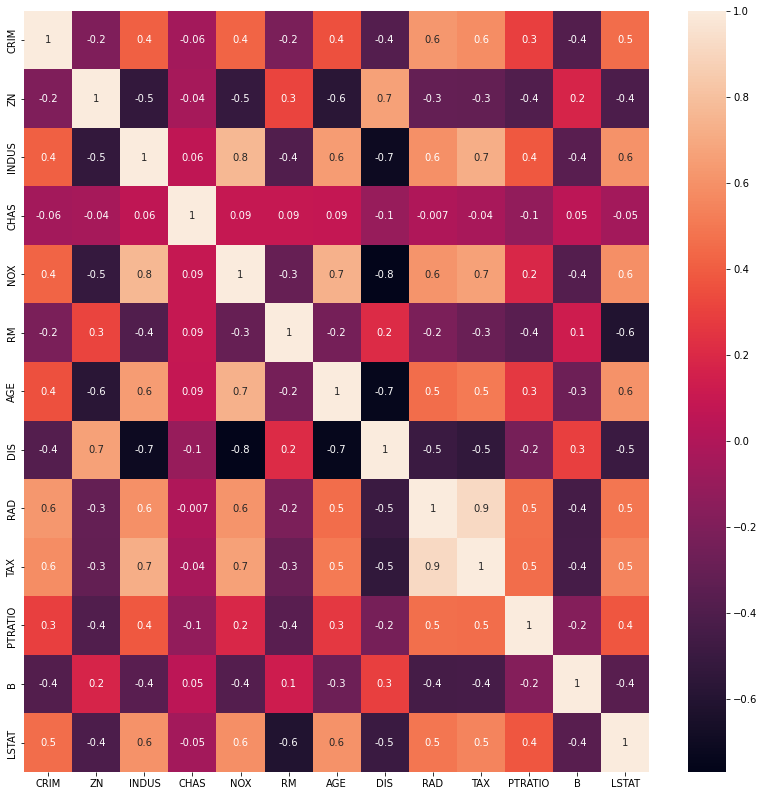

In [72]:
corr = x_data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

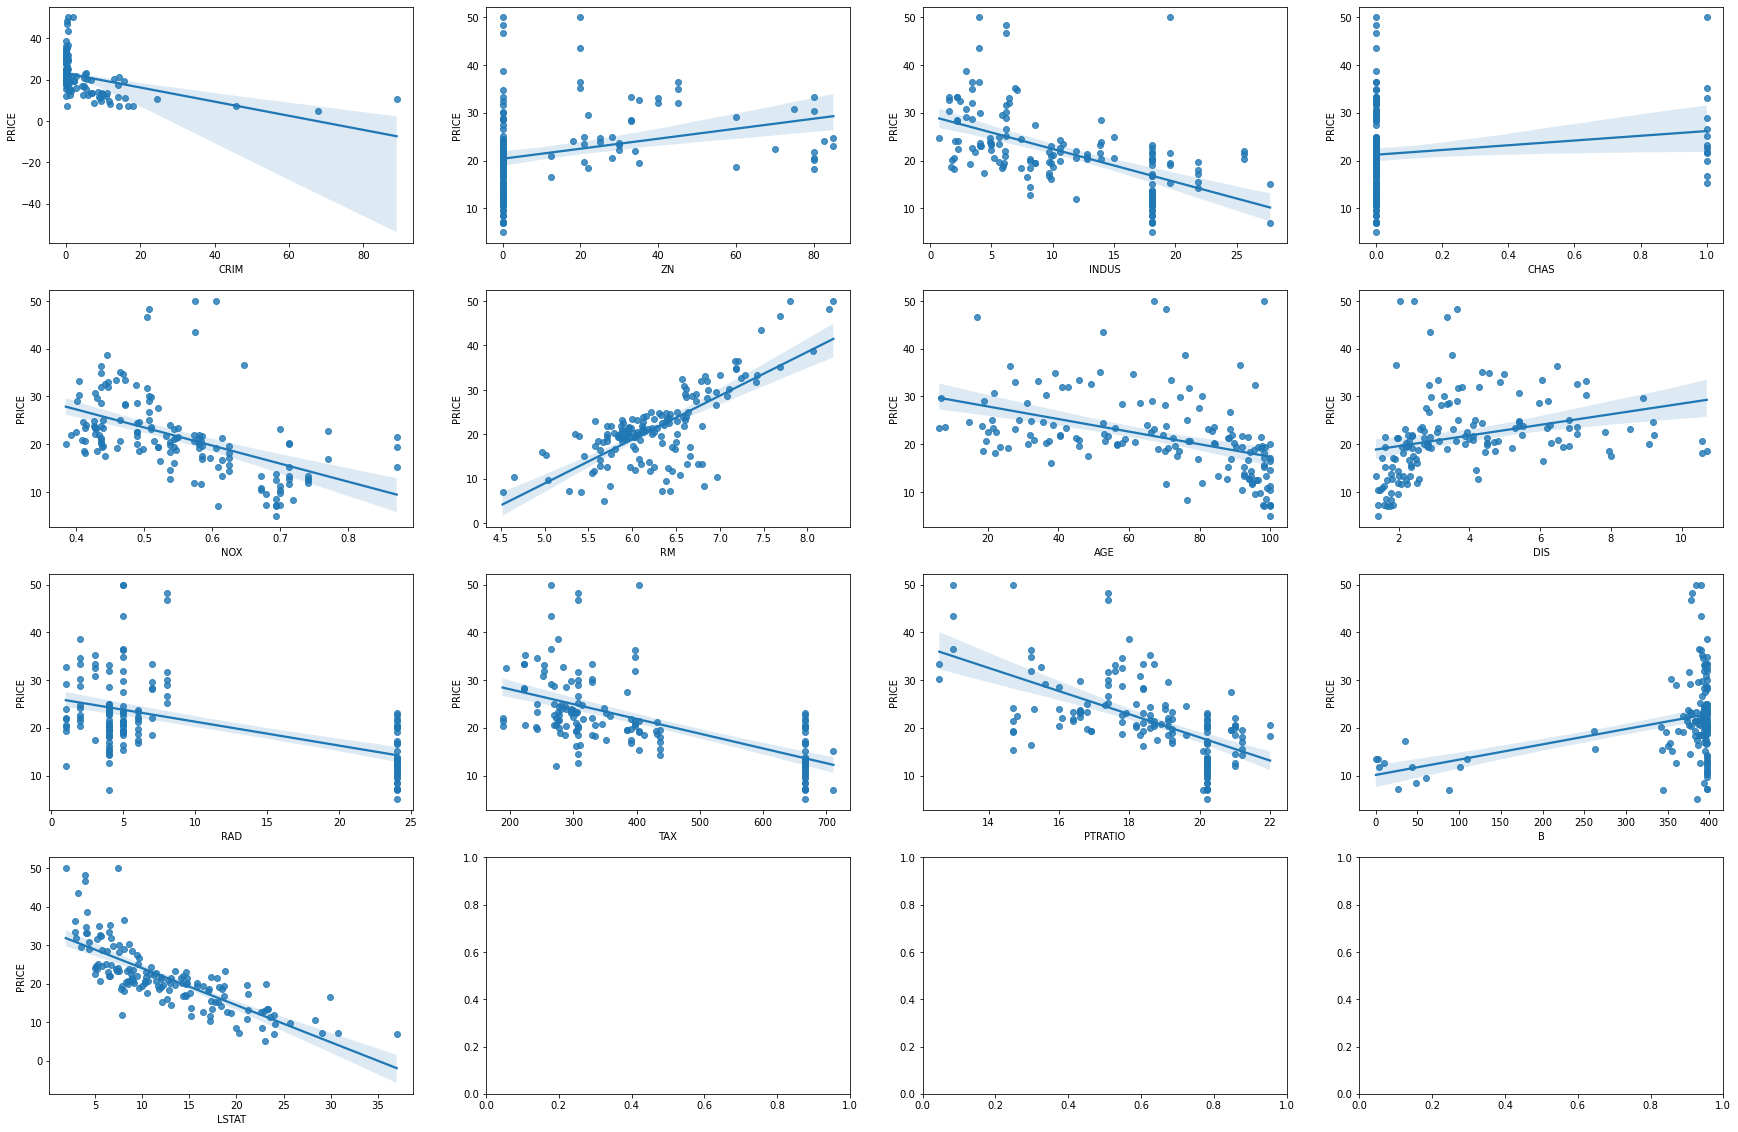

In [73]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y=y_test,data=x_test,ax=axs[row][col])

-----

## Prediction by Model

In [74]:
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

### Evaluation Metric : MSE, R2 Score, 5 fold average RMSE

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
def eval_models(answer, model):
    mse = mean_squared_error(answer, model)
    rmse = np.sqrt(mse)

    print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
    print(f'Variance score : {r2_score(answer,model):.3f}')

In [77]:
from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, data, label):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')

In [78]:
from datetime import datetime

def elapsed_time_model_fitting(model, train_data, label_data):
    elapsed_time = 0
    start = datetime.now()
    model.fit(train_data, label_data)
    end = datetime.now()
    elapsed_time = (end - start).total_seconds()
    
    return elapsed_time

### Model : LinearRegression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

eval_models(y_test, lr_preds)

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [81]:
cross_val_score_model(lr, x_data, y_target)

Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores : [3.53 5.1  5.75 8.99 5.77]
Avg RMSE : 5.829


In [82]:
original_elapsed_time = elapsed_time_model_fitting(lr, x_train, y_train)

In [83]:
print(f'original elapsed time : {original_elapsed_time}')

original elapsed time : 0.001


In [84]:
print(f'intercept : {lr.intercept_}')
print(f'coefficients : {np.round(lr.coef_,3)}')

coeff = pd.Series(data=np.round(lr.coef_,3), index=x_data.columns)
coeff.sort_values(ascending=False)

intercept : 40.995595172164336
coefficients : [-1.1300e-01  6.6000e-02  3.4000e-02  3.0460e+00 -1.9796e+01  3.3550e+00
  6.0000e-03 -1.7420e+00  3.5600e-01 -1.4000e-02 -9.2000e-01  1.0000e-02
 -5.6600e-01]


RM          3.355
CHAS        3.046
RAD         0.356
ZN          0.066
INDUS       0.034
B           0.010
AGE         0.006
TAX        -0.014
CRIM       -0.113
LSTAT      -0.566
PTRATIO    -0.920
DIS        -1.742
NOX       -19.796
dtype: float64

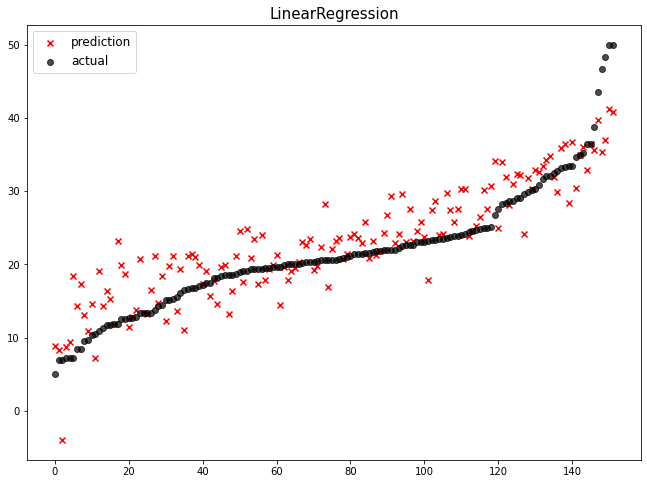

              model        mse
0  LinearRegression  17.296916


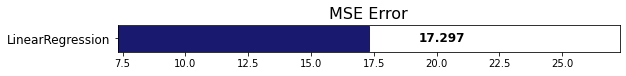

In [85]:
mse_eval('LinearRegression', lr_preds, y_test)

### Feature Selection

Lasso에서 탈락된 feature들을 drop하여 fiting함 => NOX, CHAS, INDUS

In [86]:
drop_features = ['NOX','CHAS','INDUS']

In [87]:
feature_selected_data = x_train.drop(drop_features, axis=1)
feature_selected_test_data = x_test.drop(drop_features, axis=1)

In [88]:
feature_selected_data.shape

(354, 10)

In [89]:
elapsed_time = elapsed_time_model_fitting(lr, feature_selected_data, y_train)

lr = LinearRegression()
lr.fit(feature_selected_data, y_train)
lr_preds = lr.predict(feature_selected_test_data)
eval_models(y_test, lr_preds)

print(f'origin data shape: {x_data.shape}, size: {x_data.size}')
print(f'feature_selected_data shape: {feature_selected_data.shape}, size: {feature_selected_data.size}')

## calculate Compression Rate (Uncompressed / Compressed * 100)
compRate = feature_selected_data.size / x_data.size * 100 
print(f"compression rate: {compRate:.5} %")

MSE : 17.915, RMSE : 4.233
Variance score : 0.749
origin data shape: (506, 13), size: 6578
feature_selected_data shape: (354, 10), size: 3540
compression rate: 53.816 %


In [90]:
# percentage increase
print(f'original elapsed time : {original_elapsed_time}')
print(f'elapsed time : {elapsed_time}')
increase = original_elapsed_time/elapsed_time - 1
print(f"faster by {increase} percent")

original elapsed time : 0.001
elapsed time : 0.001028
faster by -0.027237354085603127 percent


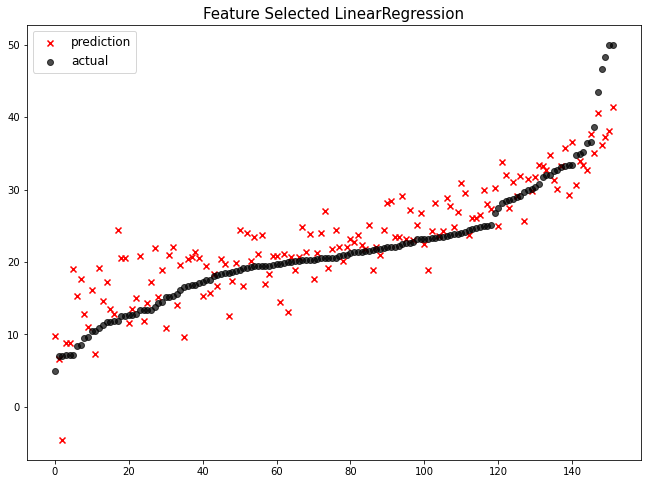

                               model        mse
0  Feature Selected LinearRegression  17.915466
1                   LinearRegression  17.296916


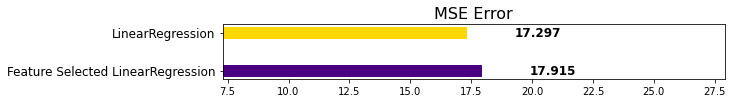

In [91]:
mse_eval('Feature Selected LinearRegression', lr_preds, y_test)

### Pipepline

파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됨.  
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
from sklearn.pipeline import make_pipeline

In [94]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [95]:
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

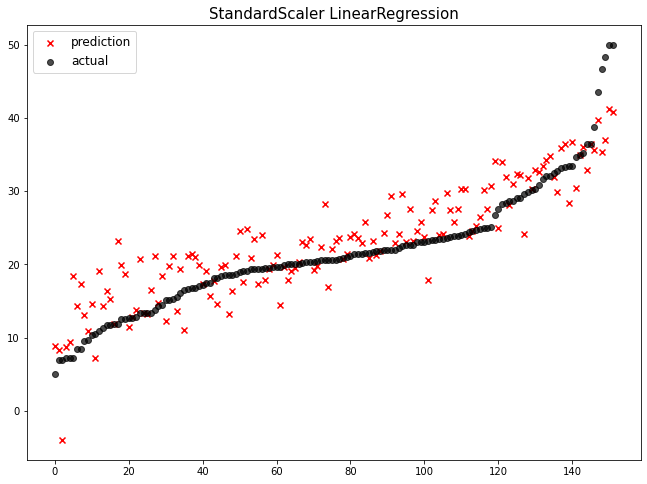

                               model        mse
0  Feature Selected LinearRegression  17.915466
1                   LinearRegression  17.296916
2    StandardScaler LinearRegression  17.296916


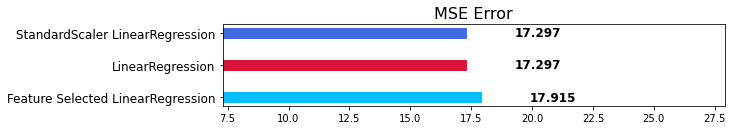

In [96]:
mse_eval('StandardScaler LinearRegression', pipeline_pred, y_test)

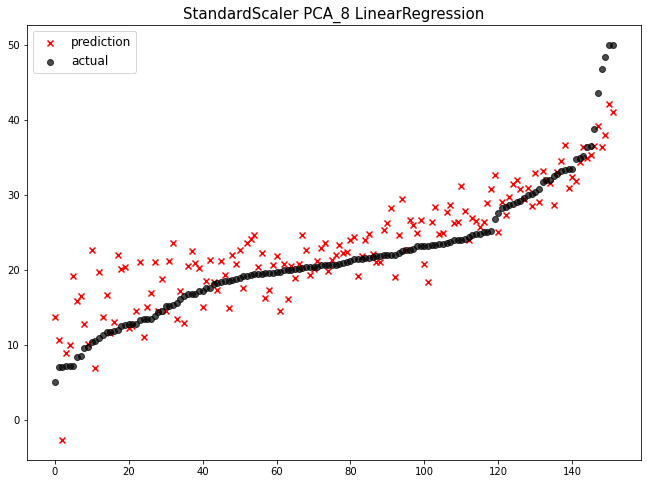

                                            model        mse
0  StandardScaler TruncatedSVD_4 LinearRegression  24.330016
1               Feature Selected LinearRegression  17.915466
2                                LinearRegression  17.296916
3                 StandardScaler LinearRegression  17.296916
4  StandardScaler TruncatedSVD_8 LinearRegression  16.658583
5           StandardScaler PCA_8 LinearRegression  16.658583
6           StandardScaler PCA_5 LinearRegression  16.249674


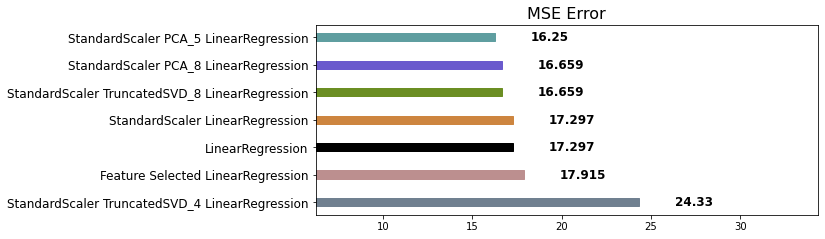

In [104]:
pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=8),
    LinearRegression()
)

pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

mse_eval('StandardScaler PCA_8 LinearRegression', pipeline_pred, y_test)

In [106]:
pca_5 = PCA(n_components=5)
boston_pca = pca_5.fit_transform(x_data)

print(f'origin data shape: {x_data.shape}, size: {x_data.size}')
print(f'pca shape: {boston_pca.shape}, size: {boston_pca.size}')

## calculate Compression Rate (Uncompressed / Compressed * 100)
compRate = boston_pca.size / x_data.size * 100 
print(f"compression rate: {compRate:.5} %")

origin data shape: (506, 13), size: 6578
pca shape: (506, 5), size: 2530
compression rate: 38.462 %


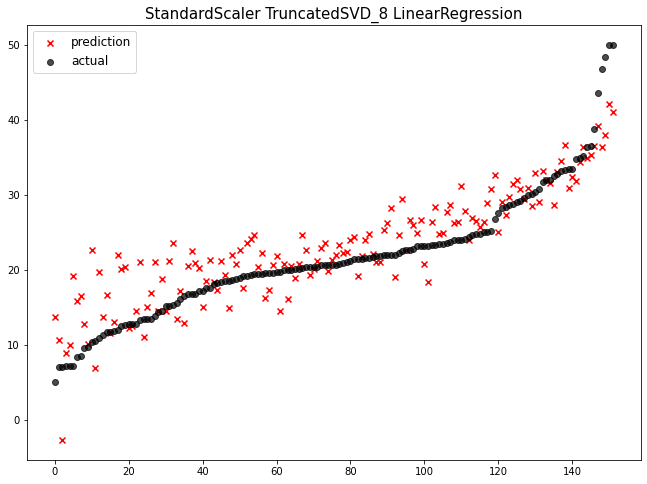

                                            model        mse
0  StandardScaler TruncatedSVD_4 LinearRegression  24.330016
1               Feature Selected LinearRegression  17.915466
2                                LinearRegression  17.296916
3                 StandardScaler LinearRegression  17.296916
4  StandardScaler TruncatedSVD_8 LinearRegression  16.658583
5           StandardScaler PCA_5 LinearRegression  16.249674


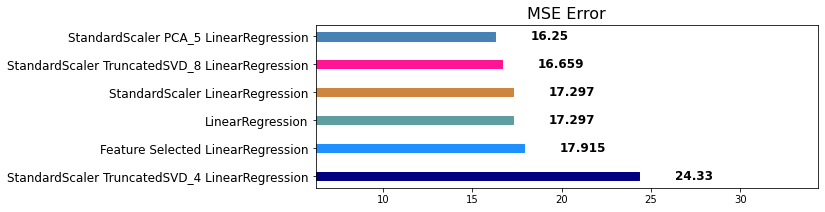

In [102]:
pipeline = make_pipeline(
    StandardScaler(),
    TruncatedSVD(n_components=8),
    LinearRegression()
)

pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

mse_eval('StandardScaler TruncatedSVD_8 LinearRegression', pipeline_pred, y_test)

In [103]:
tsvd_8 = PCA(n_components=8)
boston_tsvd = tsvd_8.fit_transform(x_data)

print(f'origin data shape: {x_data.shape}, size: {x_data.size}')
print(f'tsvd shape: {boston_tsvd.shape}, size: {boston_tsvd.size}')

## calculate Compression Rate (Uncompressed / Compressed * 100)
compRate = boston_tsvd.size / x_data.size * 100 
print(f"compression rate: {compRate:.5} %")

origin data shape: (506, 13), size: 6578
tsvd shape: (506, 8), size: 4048
compression rate: 61.538 %
